In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.stats import multivariate_normal

In [2]:
# load data 
datafile = 'dataCh4_7.mat'
data = scipy.io.loadmat(datafile)

# 구현부

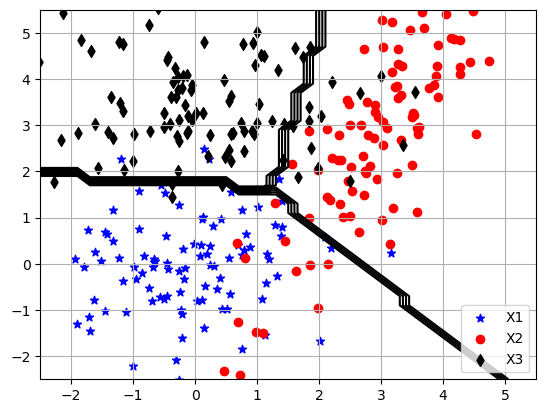

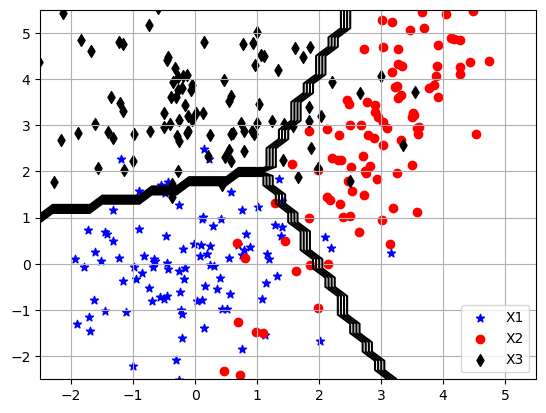

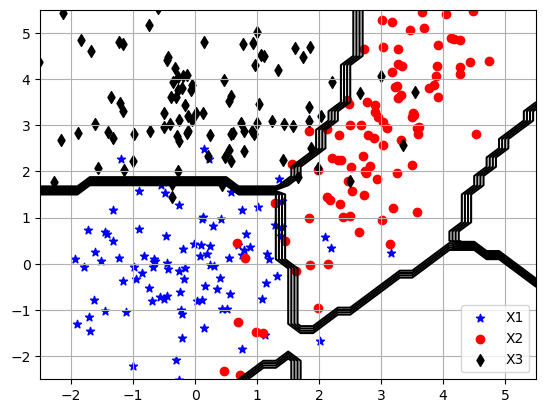

In [3]:
K = 3
d1 = np.zeros((3, 1))
d2 = np.zeros((3, 1))
d3 = np.zeros((3, 1))

# 클래스별 표본평균 계산
M = np.vstack([np.mean(data[f'X{i + 1}'], axis=0) for i in range(K)])

# 클래스별 표본공분산 계산
S = np.zeros((2, 2, K))
for i in range(K):
    S[:, :, i] = np.cov(data[f'X{i + 1}'], rowvar=False)

smean = np.mean(S, axis=2)  # 클래스별 표본공분산들의 전체 평균

# 2차원 입력 공간을 격자형태로 나누어 입력 행렬을 만듬
x, y = np.meshgrid(np.arange(-2.5, 5.6, 0.2), np.arange(-2.5, 5.6, 0.2))
XY = np.vstack([x.ravel(), y.ravel()]).T

res_classify = np.zeros((3, XY.shape[0]))
# XY의 각 점에 대해 베이지안 분류기의 분류 결과 계산
for i in range(XY.shape[0]):
    for j in range(3):
        d1[j, 0] = np.sum((XY[i, :] - M[j, :]) ** 2)
        d2[j, 0] = np.sum((XY[i, :] - M[j, :]) @ np.linalg.inv(smean) @ (XY[i, :] - M[j, :]).T)
        d3[j, 0] = np.sum((XY[i, :] - M[j, :]) @ np.linalg.inv(S[:, :, j]) @ (XY[i, :] - M[j, :]).T)

    res_classify[0, i] = np.argmin(d1)
    res_classify[1, i] = np.argmin(d2)
    res_classify[2, i] = np.argmin(d3)

# 등고선 그리기
for m in range(3):
    plt.figure(m + 1)
    plt.axis([-2.5, 5.5, -2.5, 5.5])
    plt.grid(True)
    plt.scatter(data['X1'][:, 0], data['X1'][:, 1], marker='*', label='X1', c='b')
    plt.scatter(data['X2'][:, 0], data['X2'][:, 1], marker='o', label='X2', c='r')
    plt.scatter(data['X3'][:, 0], data['X3'][:, 1], marker='d', label='X3', c='k')

    res = res_classify[m, :].reshape(x.shape)

    # levels 매개변수를 추가하여 등고선 레벨을 명시적으로 지정
    #plt.contour(x, y, res, levels=[0.5, 1.5], colors='black', linestyles='dashed')
    plt.contour(x, y, res, colors='black')
    plt.legend()
    plt.show()
